In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

output_notebook()

# set global plotting backend for pandas
pd.options.plotting.backend = "ms_matplotlib" # one of: "ms_bokeh" "ms_matplotlib" "ms_plotly"

Loading BokehJS ...

In [2]:
# # Download test file
# import requests

# url = 'https://raw.githubusercontent.com/Roestlab/massdash/dev/test/test_data/featureMap/ionMobilityTestFeatureDf.tsv'
# file_name = 'ionMobilityTestFeatureDf.tsv'

# # Send a GET request to the URL
# response = requests.get(url)

# # Save the content of the response to a file
# with open(file_name, 'wb') as file:
#     file.write(response.content)

# print(f'File {file_name} downloaded successfully!')

# # Code to add annotation to ionMobilityTestFeatureDf data

# import pyopenms as oms

# df_ms_experiment = pd.read_csv("./ionMobilityTestFeatureDf.tsv", sep="\t")
# print(df_ms_experiment.head())

# peptide = "AFVDFLSDEIK"
# charge = 2

# seq = oms.AASequence.fromString(peptide)

# ion_annotations = ['prec', 'y4^1', 'y5^1', 'y6^1', 'y7^1', 'y8^1', 'y9^1']
# ion_ordinals = [4, 5, 6, 7, 8, 9]

# print("=" * 35)
# # print("precursor mz:", round(seq.getMZ(charge), 4))

# ion_formula = [peptide]
# ion_mz = [round(seq.getMZ(charge), 4)]
# for ion in ion_ordinals:
#     suffix = seq.getSuffix(ion) 
#     # print(f"y{ion} ion sequence: {suffix}")
#     y3_formula = suffix.getFormula(oms.Residue.ResidueType.YIon, 1)  # y3++ ion
#     # print(f"y{ion} mz: {round(suffix.getMZ(1), 4)}")
#     ion_formula.append(suffix)
#     ion_mz.append(round(suffix.getMZ(1), 4))
# annotation_df = pd.DataFrame({'Annotation':ion_annotations, 'product_mz':ion_mz, 'sequence':ion_formula})
# print(annotation_df)

# df = pd.merge(df_ms_experiment[['ms_level', 'mz', 'rt', 'im', 'int', 'precursor_mz', 'product_mz', 'Annotation']], annotation_df, on=['Annotation', 'product_mz'])
# # df['sequence'] = peptide
# # df['precursor_charge'] = charge
# df.rename(columns={'Annotation':'ion_annotation'}, inplace=True)
# df.to_csv("test_data.tsv", sep="\t", index=False)
# df

In [3]:
df = pd.read_csv("test_data.tsv", sep="\t")
print(df.head())

   ms_level          mz           rt        im         int  precursor_mz  product_mz ion_annotation     sequence
0         1  642.334187  6225.005106  0.900254   76.000460      642.3295    642.3295           prec  AFVDFLSDEIK
1         1  642.334187  6225.005106  0.969271  153.011280      642.3295    642.3295           prec  AFVDFLSDEIK
2         2  504.262011  6225.110817  0.935281   68.001520      642.3295    504.2664           y4^1         DEIK
3         2  504.262011  6225.110817  1.025902   41.000328      642.3295    504.2664           y4^1         DEIK
4         2  504.262011  6225.110817  0.926001   43.000782      642.3295    504.2664           y4^1         DEIK


In [4]:
# Aggregate the peakmap data over RT
group_cols = ['ms_level', 'ion_annotation', 'rt']
df_chrom = df.apply(lambda x: x.fillna(0) \
          if x.dtype.kind in "biufc" \
          else x.fillna(".")) \
.groupby(group_cols)['int'].sum().reset_index()

# Let's simulate 3 runs of the same data
df_chrom_runs = pd.concat([df_chrom.assign(run=i) for i in range(1, 4)], ignore_index=True)
print(df_chrom_runs.groupby('run').head(2))

     ms_level ion_annotation           rt        int  run
0           1           prec  6225.005106  229.01174    1
1           1           prec  6226.792950   26.00163    1
168         1           prec  6225.005106  229.01174    2
169         1           prec  6226.792950   26.00163    2
336         1           prec  6225.005106  229.01174    3
337         1           prec  6226.792950   26.00163    3


In [5]:
# Create a 3-row subplot
fig, axs = plt.subplots(3, 1, figsize=(12, 6))

# Close the figure to suppress initial empty display
plt.close()

In [6]:
plot_list = []
i = 0
for run, run_df in df_chrom_runs.groupby('run'):
    p = run_df.plot(kind="chromatogram", x="rt", y="int", 
                by="ion_annotation", grid=False, 
                title = f"Run {run}",
                title_font_size = 18,
                xaxis_label_font_size = 16,
                yaxis_label_font_size = 16,
                xaxis_tick_font_size = 14,
                yaxis_tick_font_size = 14,
                fig=axs[i],
                legend={'show':False })
    plot_list.append(p)
    i+=1

In [7]:
# Modify first suplot
plot_list[0].fig.text(6225, 320_000, 'Your text') # Add custom text annotation to first plot
plot_list[0].fig.set_xticklabels([])
plot_list[0].fig.set_xlabel('')
# Modify second suplot
plot_list[1].fig.set_xticklabels([])
plot_list[1].fig.set_xlabel('')
# Format layout
fig.tight_layout()

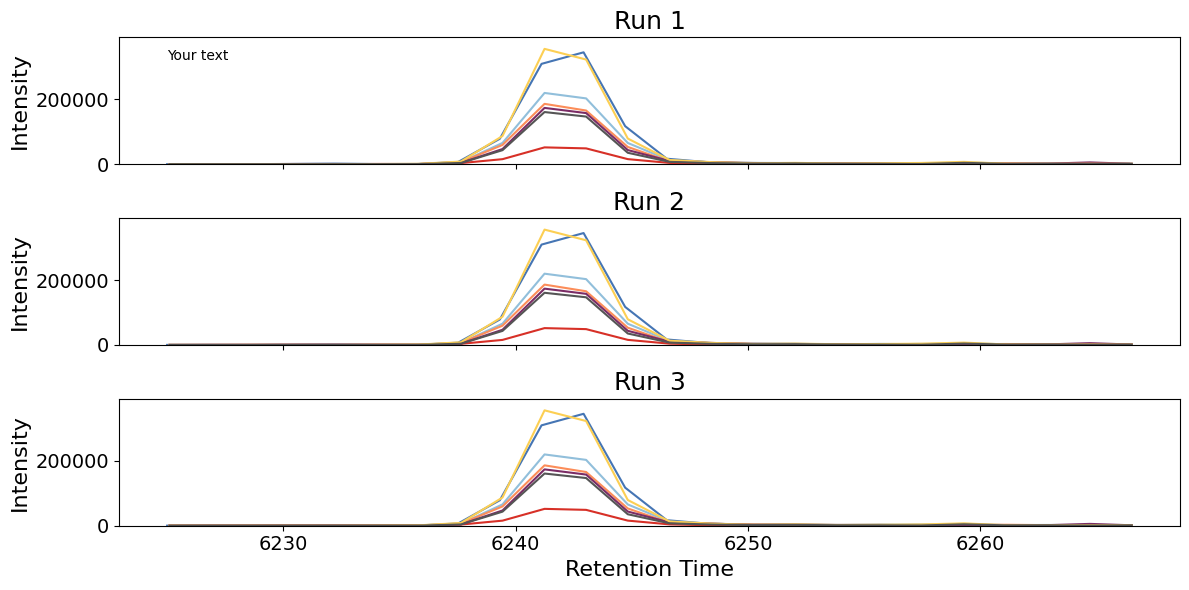

In [8]:
fig